<a href="https://colab.research.google.com/github/jun1116/CodeStates_Section_Project/blob/master/Section_4/project4_bike_vs_moto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# I am visualizing some images in the 'val/' directory
import os
data_path='/content/drive/MyDrive/Colab Notebooks/data/bike_vs_moto/'
# dataDir=cardamage_path + 'val'
# dataType='COCO_val_annos'
# mul_dataType='COCO_mul_val_annos'
# annFile='{}/{}.json'.format(dataDir,dataType)
# mul_annFile='{}/{}.json'.format(dataDir,mul_dataType)
# img_dir = "../input/coco-car-damage-detection-dataset/img"
os.listdir(data_path)

['moto', 'bike']

In [ ]:
# os.path

In [ ]:
motos=[data_path+'moto/' + i for i in os.listdir(data_path+'moto')]
bikes=[data_path+'bike/' + i for i in os.listdir(data_path+'bike')]

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
# import tensorflow_datasets as tfds
tf.__version__

'2.4.1'

In [ ]:
# img_height, img_width = 180,180
# batch_size=32
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_path,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_path,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

Found 552 files belonging to 2 classes.
Using 442 files for training.
Found 552 files belonging to 2 classes.
Using 110 files for validation.


In [ ]:
from io import BytesIO
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
X,y=[],[]
for path in motos: # Motocycle : 0
    # X.append(np.array(Image.open(path)))
    # X.append(cv2.imread(path)/256)
    img=cv2.imread(path)
    img = cv2.resize(img, dsize=(256,256), interpolation=cv2.INTER_AREA)
    X.append(img/256)

    y.append(0)
for path in bikes: # Bike : 1
    # X.append(np.array(Image.open(path)))
    img=cv2.imread(path)
    img = cv2.resize(img, dsize=(256,256), interpolation=cv2.INTER_AREA)
    X.append(img/256)

    y.append(1)

In [ ]:
X[0].shape

(256, 256, 3)

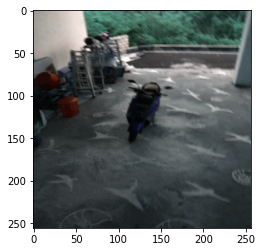

In [ ]:
plt.imshow(X[0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((441, 256, 256, 3), (441,), (111, 256, 256, 3), (111,))

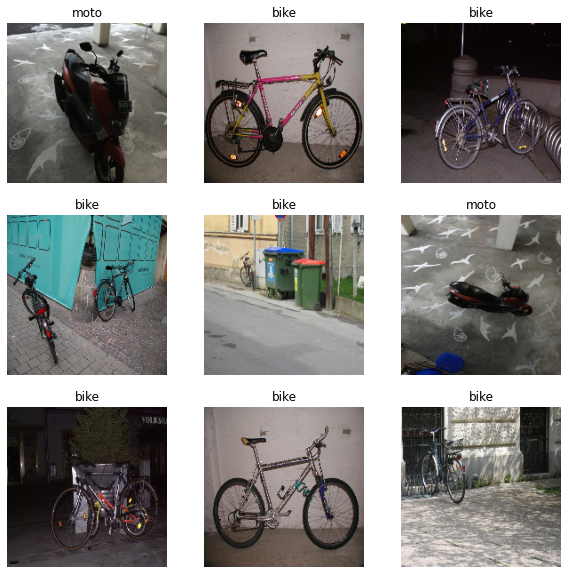

In [ ]:
# import matplotlib.pyplot as plt
# class_names = train_ds.class_names

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [ ]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixels values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)       

In [ ]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
14/14 [==============================] - 1s 27ms/step - loss: 0.5964 - accuracy: 0.6922 - val_loss: 0.1195 - val_accuracy: 0.9727
Epoch 2/5
14/14 [==============================] - 0s 16ms/step - loss: 0.1376 - accuracy: 0.9435 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 3/5
14/14 [==============================] - 0s 16ms/step - loss: 0.0322 - accuracy: 0.9878 - val_loss: 0.0402 - val_accuracy: 0.9818
Epoch 4/5
14/14 [==============================] - 0s 16ms/step - loss: 0.0374 - accuracy: 0.9846 - val_loss: 0.0263 - val_accuracy: 0.9909
Epoch 5/5
14/14 [==============================] - 0s 16ms/step - loss: 0.0487 - accuracy: 0.9839 - val_loss: 0.0069 - val_accuracy: 1.0000


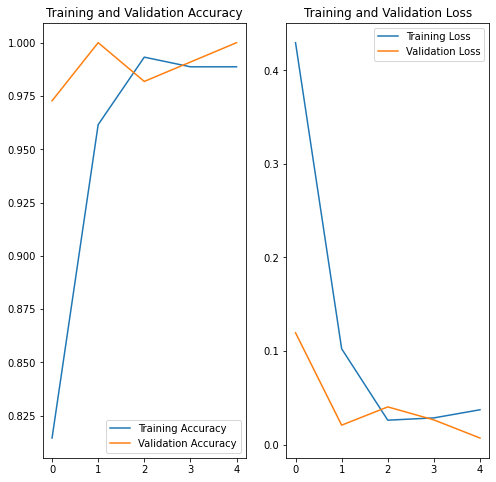

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# _url = "http://www.fntoday.co.kr/news/photo/202005/216945_113215_2910.jpg"
_url = "http://www.atlasnews.co.kr/news/photo/201908/761_1934_5416.jpg"
# _url = "http://www.mbzine.com/wp-content/uploads/2019/01/1810-ZAPPY-1-1.jpg"

_path = tf.keras.utils.get_file('bike', origin=_url)

img = keras.preprocessing.image.load_img(
    _path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

286720/282200 [==============================] - 1s 3us/step
This image most likely belongs to bike with a 100.00 percent confidence.


In [ ]:
predictions

array([[ 10.233129, -10.522248]], dtype=float32)

In [ ]:
# model.predict(val_ds.take(1))
val_ds.take(1)

1

In [ ]:

base_model = tf.keras.applications.MobileNetV2(input_shape=(256,256,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable=False



# from tensorflow.keras.callbacks import ModelCheckpoint
# checkpoint_path = 'bike_vs_moto.h5'
# save_best = ModelCheckpoint(
#     filepath=checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True,
#     save_weights_only=True, mode='auto', save_freq='epoch', option=None
# )
base_model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 128, 128, 32) 0           bn_Conv1[0][0]                   
________________

In [ ]:
global_avg_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')
# prediction_batch = 

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_avg_layer,
  prediction_layer
])

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test,y_test),
                    batch_size=64,
                    # callbacks=[callback, save_best]
                    )

Epoch 1/15
7/7 [==============================] - 1s 112ms/step - loss: 0.3952 - accuracy: 0.8617 - val_loss: 0.4057 - val_accuracy: 0.8739
Epoch 2/15
7/7 [==============================] - 1s 101ms/step - loss: 0.3714 - accuracy: 0.8844 - val_loss: 0.3815 - val_accuracy: 0.8919
Epoch 3/15
7/7 [==============================] - 1s 101ms/step - loss: 0.3492 - accuracy: 0.8957 - val_loss: 0.3576 - val_accuracy: 0.9099
Epoch 4/15
7/7 [==============================] - 1s 100ms/step - loss: 0.3280 - accuracy: 0.9116 - val_loss: 0.3362 - val_accuracy: 0.9279
Epoch 5/15
7/7 [==============================] - 1s 101ms/step - loss: 0.3081 - accuracy: 0.9342 - val_loss: 0.3162 - val_accuracy: 0.9279
Epoch 6/15
7/7 [==============================] - 1s 97ms/step - loss: 0.2893 - accuracy: 0.9524 - val_loss: 0.2980 - val_accuracy: 0.9369
Epoch 7/15
7/7 [==============================] - 1s 102ms/step - loss: 0.2720 - accuracy: 0.9546 - val_loss: 0.2794 - val_accuracy: 0.9550
Epoch 8/15
7/7 [=====

In [ ]:
pred = model.predict(X_test)
pred[0]

array([0.7588339], dtype=float32)

In [ ]:
pred[4], y_test[4]

(array([0.78051054], dtype=float32), 1)

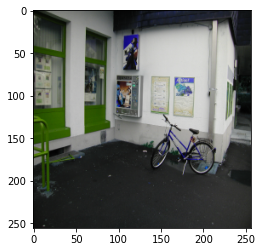

In [ ]:
## bike = 1 , moto = 0
plt.imshow(X_test[4])

[0.8789812] 1


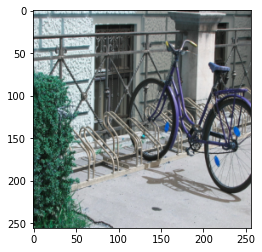

In [ ]:
def check_for_pred(pred, idx):
    print(pred[idx], y_test[idx])
    plt.imshow(X_test[idx])
check_for_pred(pred, 7)

[0.11020851] 0


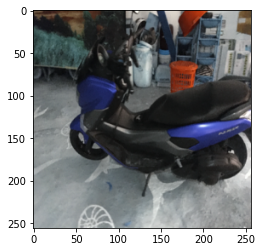

In [ ]:
check_for_pred(pred, 15)

[0.08744252] 0


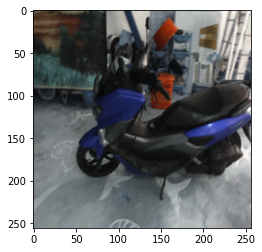

In [ ]:
check_for_pred(pred, 27)

[0.82025254] 1


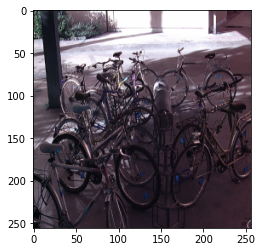

In [ ]:
check_for_pred(pred, 37)